# Author :Vikas Shahu

## Task2 Prediction using unsupervised machine learning


# GRIP @ The Sparks Foundation


## step1 reading data from source

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('Iris.csv')

In [42]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## step2 EDA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['Species'] = data['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## step3 finding best k value using elbow technique

In [13]:
from sklearn.cluster import KMeans

In [15]:
import warnings
warnings.filterwarnings('ignore')
wcss = [] 
for i in range(1,11):
    kmeans= KMeans(n_clusters = i,init='k-means++',random_state = 10)
    kmeans.fit(data.iloc[:,:-1])
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[281918.32439999987,
 70616.29893333331,
 31365.589670588226,
 17793.07118503118,
 11442.86805561735,
 7917.101758974359,
 5935.63121836211,
 4552.590809941517,
 3581.078914215687,
 2963.9310521708694]

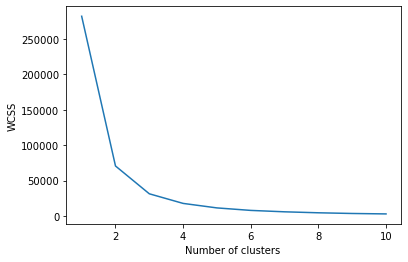

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters ')
plt.ylabel('WCSS')
plt.show()

In [18]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [19]:
train_data = data.iloc[:,:-1]
train_data.drop(columns=['Id'],axis=1,inplace=True)
train_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## step 4 clustering data into k clusters 

In [20]:
cluster_model = KMeans(n_clusters=3,init='k-means++',random_state=10)


In [21]:
cluster_model.fit(train_data)

KMeans(n_clusters=3, random_state=10)

In [22]:
cluster_labels = cluster_model.fit_predict(train_data)
cluster_labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## step 5 visualization

Text(0.5, 1.0, 'After Classification')

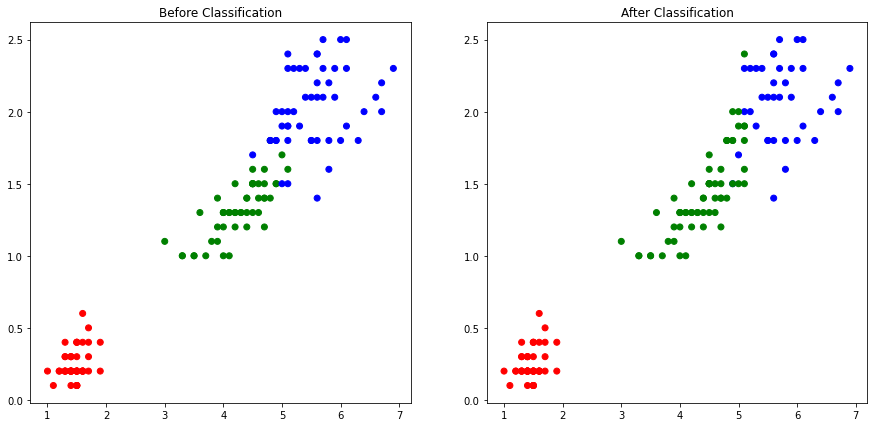

In [23]:
import numpy as np
plt.figure(figsize=(15,7))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(cluster_labels, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=colors[data['Species']])
plt.title('Before Classification')


plt.subplot(1, 2, 2)
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=colors[predictedY])
plt.title("After Classification")


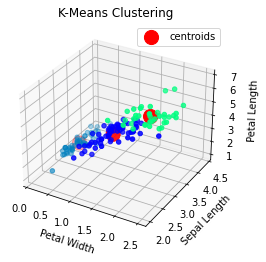

In [41]:

K = 3
km = KMeans(K)
clusts = km.fit_predict(train_data)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['PetalWidthCm'],data['SepalWidthCm'], data['PetalLengthCm'],
                     c=clusts,s=20, cmap='winter')
scatter = ax.scatter(km.cluster_centers_[:, 3],
            km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s = 200,
            marker='o',
            c='red',
            label='centroids')

ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()

## step 6 Evaluating Model 

In [281]:
import sklearn.metrics as sm
sm.accuracy_score(data.Species, cluster_model.labels_)


0.8933333333333333

#### using confusion metric 

In [43]:
pd.crosstab(data.Species, cluster_model.labels_)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(data.Species, cluster_model.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Conclusion

### for unlabeled we use clustering algorithm. Since we don't know the class value we group the data according the similarity( how close data points are). I was able to cluster the data into three clusters using Kmeans algorithm with accuracy 89.33%.